## Setup

In [4]:
### Load required packages 
import numpy as np 
import pandas as pd 
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True) 

import warnings
warnings.filterwarnings('ignore')

seed = 100
np.random.seed(seed)

## Wrapper function

In [174]:
### process the data to the stage of modeling 
def process_data(df):
    return df

    ### log-transform the SL
    
    
    
    ### add indication of outlier for EEG
    
    
    
    ###

### plot the categorical variable against numerical variable
def plot_cat_against_num(df=df, cat='', num=''):
    sns.boxplot(x = df[cat], y = df[num], palette='Set2')
    
### construct table for categorical variable to categorical variable
def tb_cat_to_cat(df=df, cat_1='', cat_2=''):
    return pd.crosstab(df[cat_1], df[cat_2]).apply(lambda x: round((x/np.sum(x))*100, 2), axis=1)

### plot the categorical variable against categorical variable
def plot_cat_to_cat(df=df, cat_1='', cat_2=''):
    tb_cat_to_cat(df_tr, cat_1, cat_2).plot(kind='bar', stacked=True, edgecolor='none', color=['#001D30', '#FF5D2D'], rot=0)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.ylabel('Percentage')
    
### Aonva calculator 
def anova_calculator(df=df, cat='', num=''):
    from scipy.stats import f_oneway
    
    num_list = []
    
    for ind in np.unique(df[cat]):
        num_list.append(df[num].values[df[cat].values == ind])
        
    return f_oneway(*num_list)

### Narrow the data into 0 to 1
def zero_one_transform(col, max_val=None, min_val=None):
    if not (max_val or min_val):
        max_val = np.max(col)
        min_val = np.min(col)
    
    new_col = col.apply(lambda x: (x - min_val)/(max_val - min_val))
    
    return new_col, max_val, min_val

### Standardize the feature
def std_scaler(col):
    from sklearn.preprocessing import StandardScaler
    std = StandardScaler()
    std.fit(col)
    
    return std.transform(col), std

## Issues

1. TIME should not be used.
2. The interaction bwtween BP and HR

## Overview

In [6]:
file = 'D:/Dataset/Side_project_Fall_detection/falldetection.csv'
df = pd.read_csv(file)

In [7]:
df.shape

(16382, 7)

In [8]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 7 columns):
ACTIVITY       16382 non-null int64
TIME           16382 non-null float64
SL             16382 non-null float64
EEG            16382 non-null float64
BP             16382 non-null int64
HR             16382 non-null int64
CIRCLUATION    16382 non-null int64
dtypes: float64(3), int64(4)
memory usage: 896.0 KB


In [10]:
np.sum(df.isnull())

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
dtype: int64

There are no NAs.

Meaning of the features:
1. TIME: monitoring time
2. SL: sugar level
3. EEG: EEG monitoring rate
4. BP: Blood pressure
5. HR: Heart beat rate
6. CIRCULATION: Blood circulation

In [11]:
### The distribution of target variable 
df['ACTIVITY'].value_counts()

0    4608
3    3588
4    3494
2    2502
5    1688
1     502
Name: ACTIVITY, dtype: int64

For reference: 0- Standing 1- Walking 2- Sitting 3- Falling 4- Cramps 5- Running

## Split the data

In [12]:
### Split the data into test, validation and test dataset

## train and test
from sklearn.model_selection import train_test_split
df_tr, df_test = train_test_split(df, test_size=0.2, stratify=df['ACTIVITY'], random_state = seed)
df_tr.index = range(len(df_tr))
df_test.index = range(len(df_test))

## train and validation
df_tr, df_valid = train_test_split(df_tr, test_size=0.2, stratify=df_tr['ACTIVITY'], random_state = seed)
df_tr.index = range(len(df_tr))
df_valid.index = range(len(df_valid))

In [13]:
### checking
print(df_tr['ACTIVITY'].value_counts()/len(df_tr))
print('###')
print(df_valid['ACTIVITY'].value_counts()/len(df_valid))
print('###')
print(df_test['ACTIVITY'].value_counts()/len(df_test))

0    0.281286
3    0.219000
4    0.213277
2    0.152709
5    0.103014
1    0.030713
Name: ACTIVITY, dtype: float64
###
0    0.281190
3    0.219000
4    0.213277
2    0.152995
5    0.103014
1    0.030523
Name: ACTIVITY, dtype: float64
###
0    0.281355
3    0.219103
4    0.213305
2    0.152579
5    0.103143
1    0.030516
Name: ACTIVITY, dtype: float64


## EDA

#### TIME

In [14]:
df_tr['TIME'].describe()

count    10484.000000
mean     10970.030022
std       5297.813932
min       1954.230000
25%       7265.975000
50%       9781.010000
75%      13493.800000
max      45110.200000
Name: TIME, dtype: float64

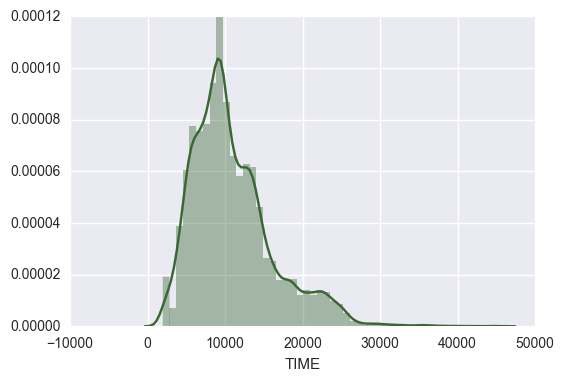

In [15]:
sns.distplot(df_tr['TIME'], hist_kws={'edgecolor':'none'}, color='#3A6733')

#### SL

In [16]:
df_tr['SL'].describe()

count    1.048400e+04
mean     7.623352e+04
std      1.290939e+05
min      4.222420e+01
25%      1.011275e+04
50%      3.120740e+04
75%      8.208950e+04
max      2.426140e+06
Name: SL, dtype: float64

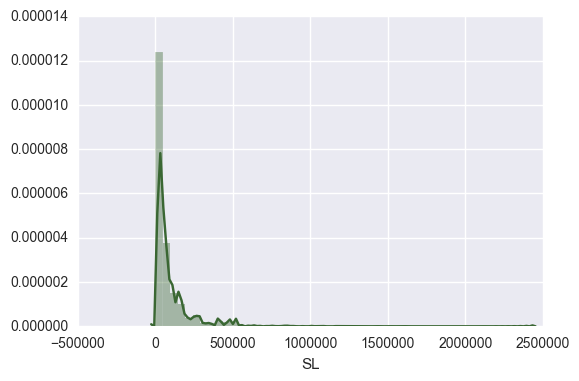

In [17]:
sns.distplot(df_tr['SL'], hist_kws={'edgecolor':'none'}, color='#3A6733')

Very right-skewed

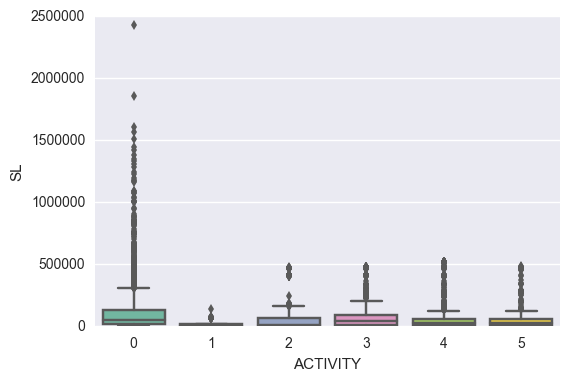

In [18]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'SL')

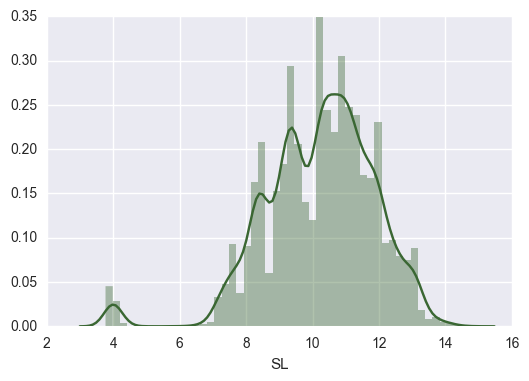

In [19]:
### using log transformation
sns.distplot(np.log1p(df_tr['SL']), hist_kws={'edgecolor':'none'}, color='#3A6733')

In [20]:
### construct new variable: log-transformed SL
df_tr['log_SL'] = np.log1p(df_tr['SL'])

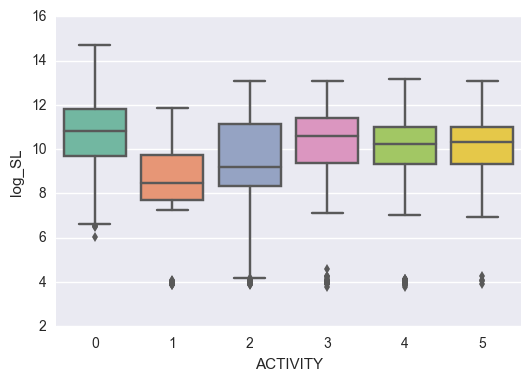

In [21]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'log_SL')

#### EEG

In [22]:
df_tr['EEG'].describe()

count    1.048400e+04
mean    -6.163453e+03
std      1.334419e+05
min     -1.262600e+07
25%     -5.660000e+03
50%     -3.366330e+03
75%     -2.155080e+03
max      1.410000e+06
Name: EEG, dtype: float64

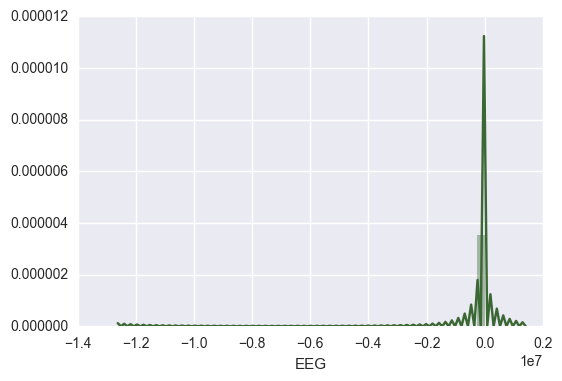

In [23]:
sns.distplot(df_tr['EEG'], hist_kws={'edgecolor':'none'}, color='#3A6733')

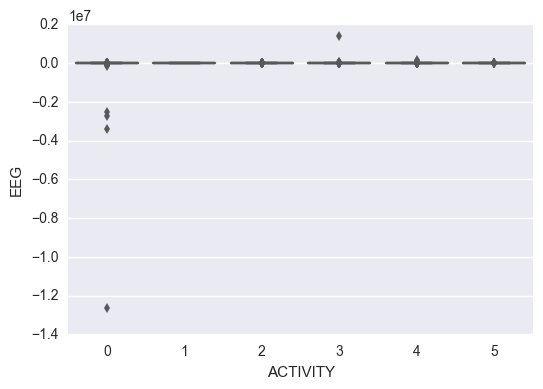

In [24]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'EEG')

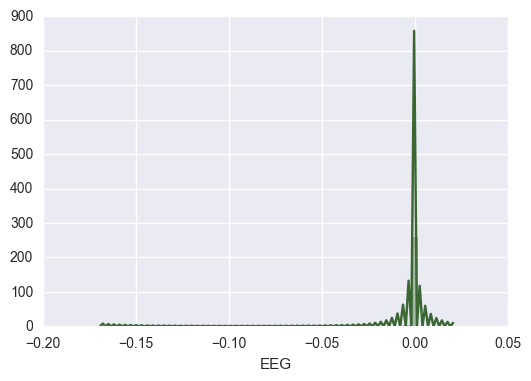

In [25]:
### The inverse of the EEG
sns.distplot(1/df_tr['EEG'], hist_kws={'edgecolor':'none'}, color='#3A6733')

In [26]:
print(np.sum((1/df_tr['EEG']) == np.Inf))
print(np.sum((1/df_tr['EEG']) == -np.Inf))

0
0


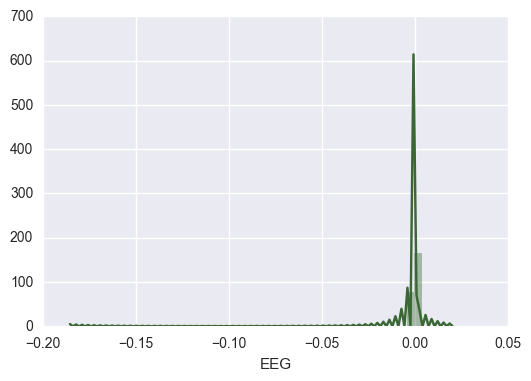

In [27]:
sns.distplot(np.log1p(1/df_tr['EEG']), hist_kws={'edgecolor':'none'}, color='#3A6733')

In [28]:
np.sum(np.log1p(1/df_tr['EEG']) == np.nan)

0

In [29]:
### Construct new variable: log-transformed inverse EEG
df_tr['log_inverse_EEG'] = df_tr['EEG'].apply(lambda x: np.log1p(1/x))

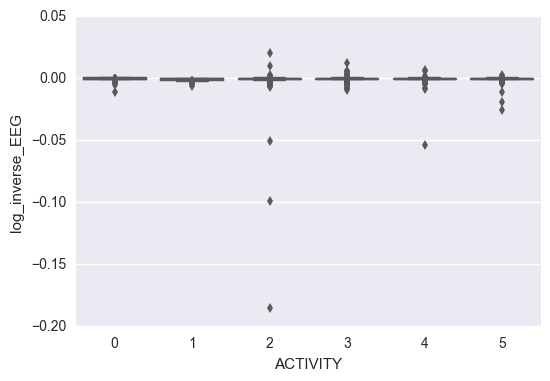

In [30]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'log_inverse_EEG')

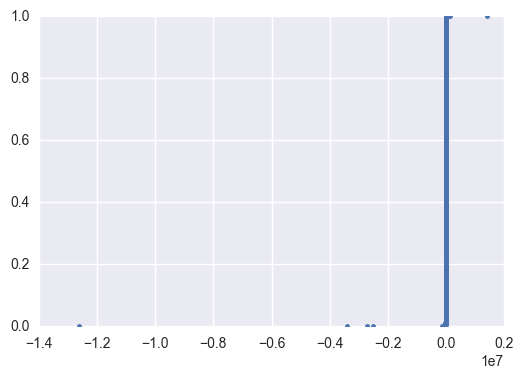

In [31]:
### Plot ECDF 
EEG_x = df_tr['EEG'].sort_values().values
EEG_y = [(x+1)/len(EEG_x) for x in range(len(EEG_x))]

plt.plot(EEG_x, EEG_y, marker='.', linestyle='none')

Most of the data falls within a range with some extreme outliers

In [32]:
np.sum(df_tr['EEG'].sort_values().values == 0)

0

In [33]:
### Find the outliers
df_tr['EEG'].describe()

q1 = df_tr['EEG'].describe()['25%']
q3 = df_tr['EEG'].describe()['75%']

In [34]:
lower_fence = q1 - 1.5*(q3 - q1)
upper_fence = q3 + 1.5*(q3 - q1)

In [35]:
outlier_EEG_ind = np.where((df_tr['EEG'].values < lower_fence)|(df_tr['EEG'].values > upper_fence))[0]
non_outlier_EEG_ind = np.setdiff1d(range(len(df_tr['EEG'])), outlier_EEG_ind)

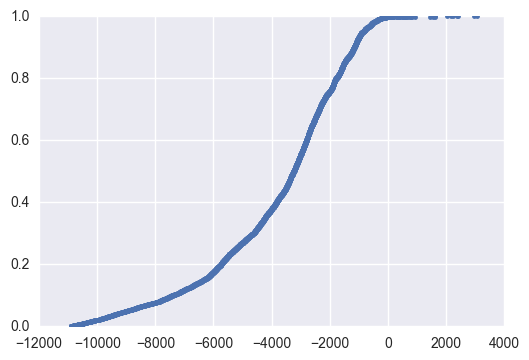

In [36]:
EEG_x = df_tr['EEG'][non_outlier_EEG_ind].sort_values().values
EEG_y = [(x+1)/len(EEG_x) for x in range(len(EEG_x))]

plt.plot(EEG_x, EEG_y, marker='.', linestyle='none')

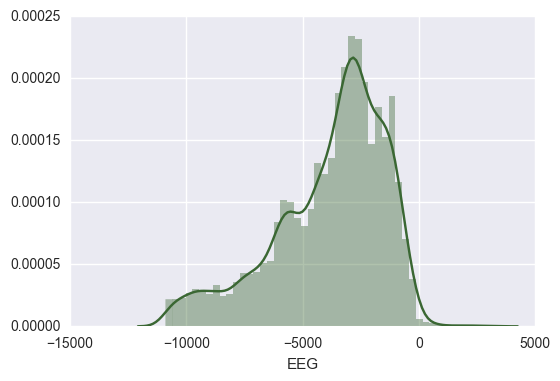

In [37]:
### Without outlier
sns.distplot(df_tr['EEG'][non_outlier_EEG_ind], hist_kws={'edgecolor':'none'}, color='#3A6733')

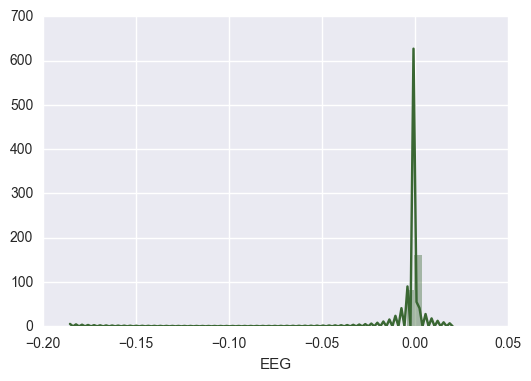

In [38]:
### Without outlier and log-transformed inverse 
sns.distplot(np.log1p(1/(df_tr['EEG'][non_outlier_EEG_ind])), hist_kws={'edgecolor':'none'}, color='#3A6733')

Worse...

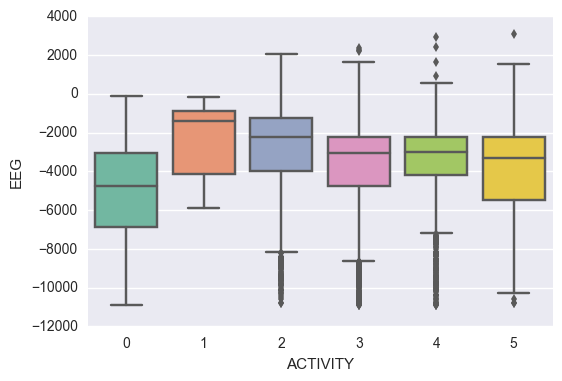

In [39]:
plot_cat_against_num(df_tr.ix[non_outlier_EEG_ind, :], 'ACTIVITY', 'EEG')

In [40]:
### Construct new feature: indication of outlier for EEG
df_tr['EEG_outlier'] = 0
df_tr['EEG_outlier'][outlier_EEG_ind] = 1

In [41]:
### Display the distribution between target variable against EEG_outlier
tb_cat_to_cat(df_tr, 'ACTIVITY', 'EEG_outlier')

EEG_outlier,0,1
ACTIVITY,,
0,88.81,11.19
1,100.00,0.00
2,98.50,1.50
3,95.38,4.62
4,95.08,4.92
5,99.07,0.93


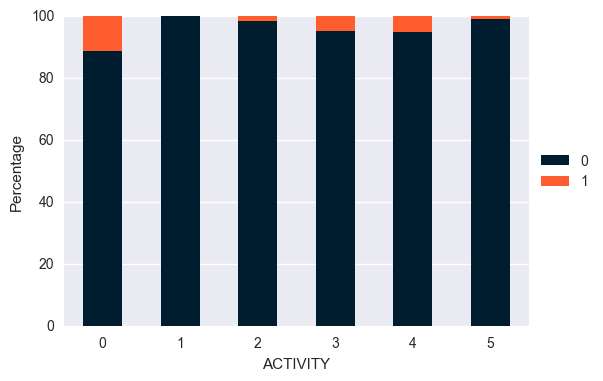

In [42]:
plot_cat_to_cat(df_tr, 'ACTIVITY', 'EEG_outlier')

#### BP

In [43]:
df['BP'].describe()

count    16382.000000
mean        58.251068
std         48.292926
min          0.000000
25%         25.000000
50%         44.000000
75%         78.000000
max        533.000000
Name: BP, dtype: float64

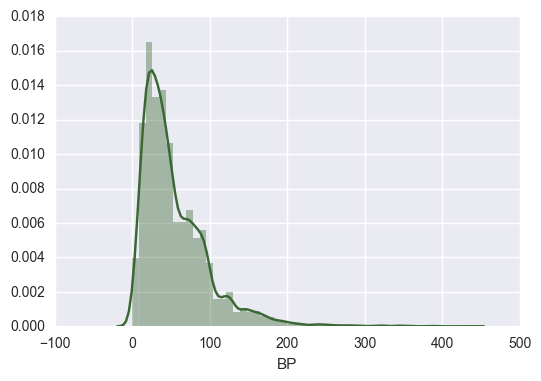

In [44]:
sns.distplot(df_tr['BP'][non_outlier_EEG_ind], hist_kws={'edgecolor':'none'}, color='#3A6733')

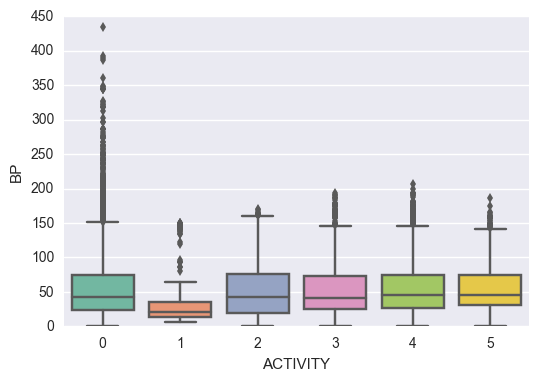

In [45]:
plot_cat_against_num(df_tr.ix[non_outlier_EEG_ind, :], 'ACTIVITY', 'BP')

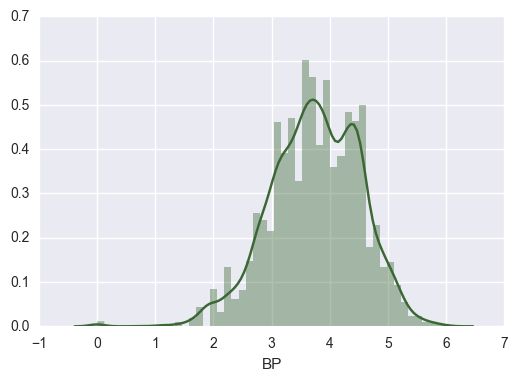

In [46]:
### log-transformed BP
sns.distplot(np.log1p(df_tr['BP'][non_outlier_EEG_ind]), hist_kws={'edgecolor':'none'}, color='#3A6733')

In [47]:
### Construct new variable: log-transformed BP
df_tr['log_BP'] = np.log1p(df_tr['BP'])

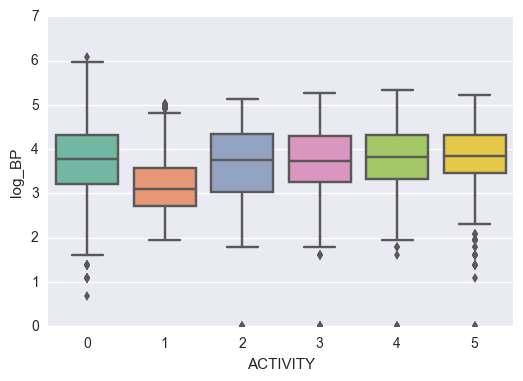

In [48]:
plot_cat_against_num(df_tr.ix[non_outlier_EEG_ind, :], 'ACTIVITY', 'log_BP')

#### HR

In [49]:
df['HR'].describe()

count    16382.000000
mean       211.536992
std        129.949521
min         33.000000
25%        119.000000
50%        180.000000
75%        271.000000
max        986.000000
Name: HR, dtype: float64

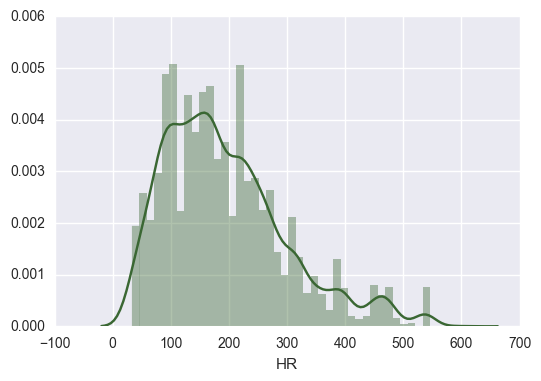

In [50]:
sns.distplot(df_tr['HR'][non_outlier_EEG_ind], hist_kws={'edgecolor':'none'}, color='#3A6733')

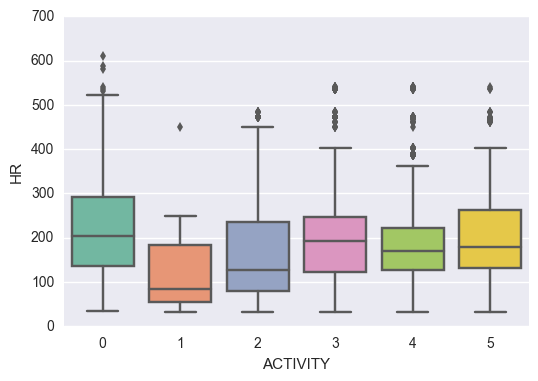

In [51]:
plot_cat_against_num(df_tr.ix[non_outlier_EEG_ind, :], 'ACTIVITY', 'HR')

In [52]:
### Construct new variable: log-transformed HR
df_tr['log_HR'] = np.log1p(df_tr['HR'])

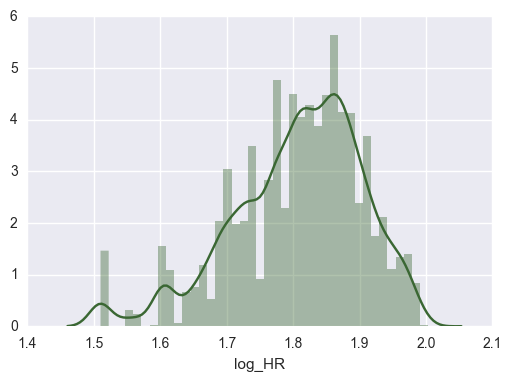

In [53]:
sns.distplot(np.log1p(df_tr['log_HR'][non_outlier_EEG_ind]), hist_kws={'edgecolor':'none'}, color='#3A6733')

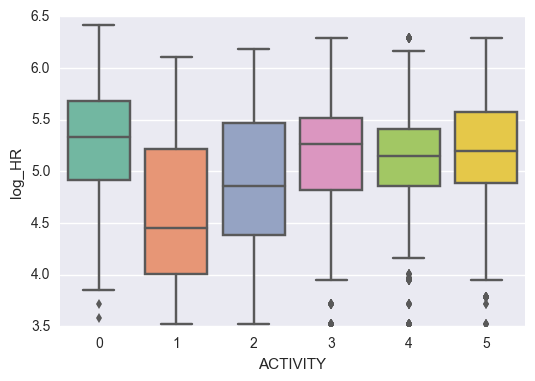

In [54]:
plot_cat_against_num(df_tr.ix[non_outlier_EEG_ind, :], 'ACTIVITY', 'log_HR')

#### CIRCLUATION

In [55]:
df_tr['CIRCLUATION'].describe()

count    10484.000000
mean      2929.621709
std       3889.699878
min          5.000000
25%        587.000000
50%       1626.000000
75%       3539.000000
max      52210.000000
Name: CIRCLUATION, dtype: float64

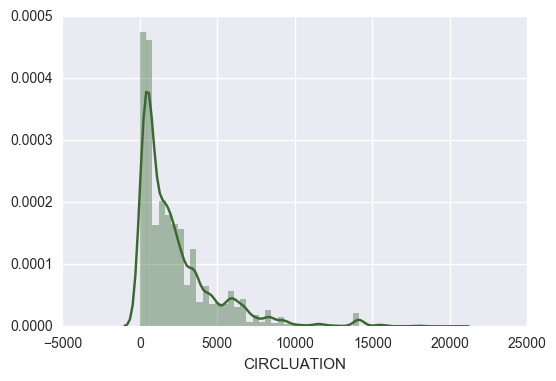

In [56]:
sns.distplot(df_tr['CIRCLUATION'][non_outlier_EEG_ind], hist_kws={'edgecolor':'none'}, color='#3A6733')

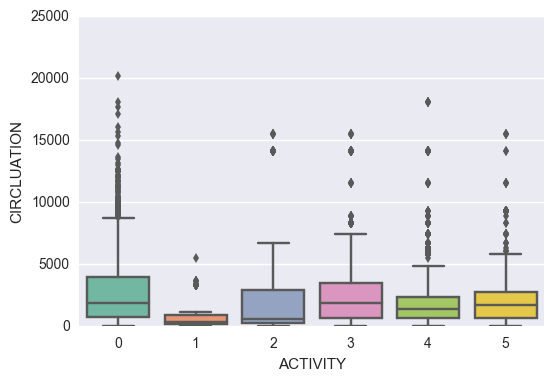

In [57]:
plot_cat_against_num(df_tr.ix[non_outlier_EEG_ind, :], 'ACTIVITY', 'CIRCLUATION')

In [58]:
### Construct new variable: log-transformed HR
df_tr['log_CIRCLUATION'] = np.log1p(df_tr['CIRCLUATION'])

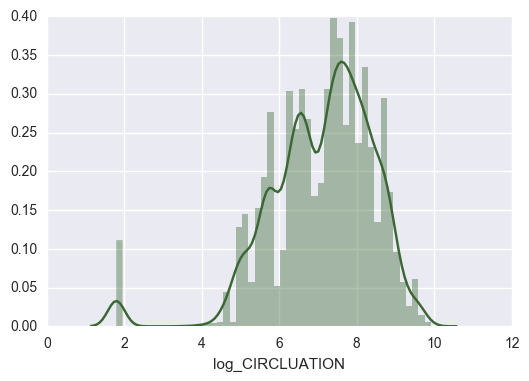

In [59]:
sns.distplot(df_tr['log_CIRCLUATION'][non_outlier_EEG_ind], hist_kws={'edgecolor':'none'}, color='#3A6733')

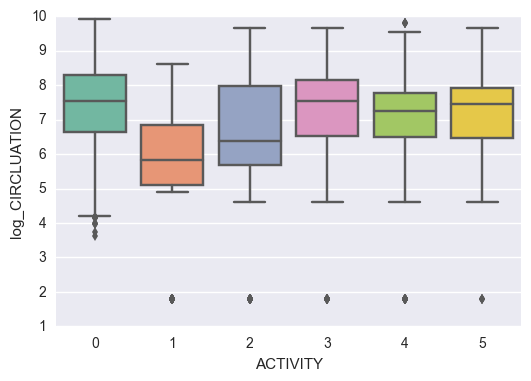

In [60]:
plot_cat_against_num(df_tr.ix[non_outlier_EEG_ind, :], 'ACTIVITY', 'log_CIRCLUATION')

## Feature Engineering

In [61]:
df_tr.columns

Index(['ACTIVITY', 'TIME', 'SL', 'EEG', 'BP', 'HR', 'CIRCLUATION', 'log_SL',
       'log_inverse_EEG', 'EEG_outlier', 'log_BP', 'log_HR',
       'log_CIRCLUATION'],
      dtype='object')

#### Compare the goodness of original features and the log-transformed features

In [62]:
original_num_features = ['SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

In [63]:
for ind in original_num_features:
    if ind != 'EEG':
        print(ind, anova_calculator(df_tr, 'ACTIVITY', ind)[0], 'v.s.', anova_calculator(df_tr, 'ACTIVITY', 'log_'+ind)[0])
    else:
        print(ind, anova_calculator(df_tr, 'ACTIVITY', ind)[0], 'v.s.', 
              anova_calculator(df_tr.ix[df_tr['EEG_outlier'] == 0, :], 'ACTIVITY', ind)[0])

SL 92.0768994991 v.s. 242.695458393
EEG 2.42519301126 v.s. 258.785852903
BP 69.1324504045 v.s. 56.1718589503
HR 151.810466016 v.s. 228.041600706
CIRCLUATION 93.3128395745 v.s. 234.090810928


For BP, the non-log form is better?

### For the current setting of features, use a baseline random forest model to select the features

In [64]:
features = ['SL', 'EEG', 'BP', 'HR', 'CIRCLUATION', 'log_SL', 'log_BP', 'log_HR', 'log_CIRCLUATION', 'EEG_outlier']

#### Initial trial on the accuracy

In [65]:
def model_testing(model, df = df, features = features, seed = seed):
    #from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score

    X = df_tr.ix[:, features].values
    y = df_tr['ACTIVITY'].values

    skf = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

    mean_score = []

    for ind in list(skf.split(X=X, y=y)):
        #model = RandomForestClassifier()
        model.fit(X[ind[0]], y[ind[0]])

        score = accuracy_score(y[ind[1]], model.predict(X[ind[1]]))
        mean_score.append(score)
        print(score)

    print('Mean Score (accuracy):', np.mean(mean_score))

In [66]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.750952380952
0.742012398665
0.734255725191
0.749045801527
0.738424821002
Mean Score (accuracy): 0.742938225467


#### Features importance

In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=seed)

In [68]:
X = df_tr.ix[:, features].values
y = df_tr['ACTIVITY'].values
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [69]:
print(model.feature_importances_)

[ 0.14563339  0.16733487  0.08884396  0.08575532  0.08812466  0.14225045
  0.10601605  0.09403869  0.08071007  0.00129253]


In [70]:
np.argsort(model.feature_importances_)[::-1]

for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

EEG: 0.167334867921
SL: 0.145633385149
log_SL: 0.142250449008
log_BP: 0.106016052807
log_HR: 0.0940386944524
BP: 0.088843961094
CIRCLUATION: 0.0881246628109
HR: 0.0857553232507
log_CIRCLUATION: 0.0807100707112
EEG_outlier: 0.0012925327965


### New set of features

remove: 'log_SL', 'BP', 'HR', 'log_CIRCLUATION'

In [71]:
features = ['SL', 'EEG', 'CIRCLUATION', 'log_BP', 'log_HR', 'EEG_outlier']

In [72]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.738095238095
0.742012398665
0.732824427481
0.734732824427
0.740334128878
Mean Score (accuracy): 0.737599803509


In [73]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=seed)

In [74]:
X = df_tr.ix[:, features].values
y = df_tr['ACTIVITY'].values
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=100,
            verbose=0, warm_start=False)

In [75]:
print(model.feature_importances_)

[ 0.26385065  0.23025149  0.15720063  0.17659211  0.17081819  0.00128694]


In [76]:
np.argsort(model.feature_importances_)[::-1]

for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

SL: 0.263850645986
EEG: 0.230251494154
log_BP: 0.176592106752
log_HR: 0.170818189127
CIRCLUATION: 0.157200627246
EEG_outlier: 0.00128693673495


The accuracy is now lower. I would then find new features.

### Construct New Features

#### Correlations between the original features

In [77]:
temp_features = ['SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

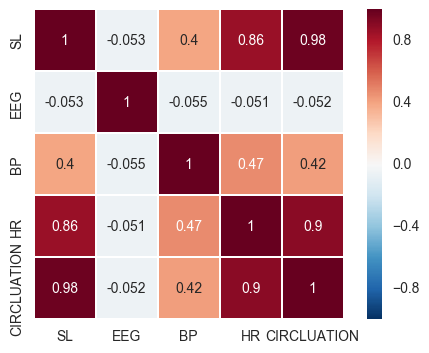

In [78]:
sns.heatmap(df_tr.ix[:, temp_features].corr(), annot=True, square=True, linewidth=1)

In [79]:
features

['SL', 'EEG', 'CIRCLUATION', 'log_BP', 'log_HR', 'EEG_outlier']

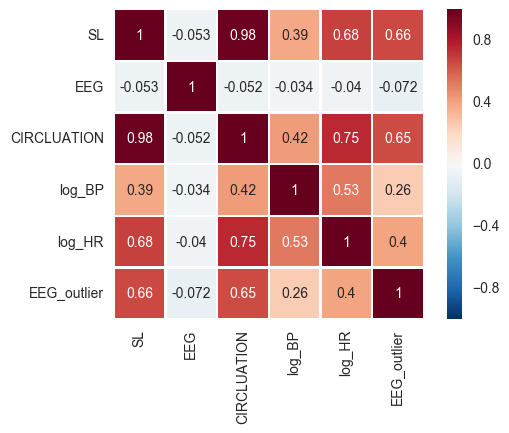

In [80]:
sns.heatmap(df_tr.ix[:, features].corr(), annot=True, square=True, linewidth=1)

#### Baseline model performance

In [81]:
temp_features

['SL', 'EEG', 'BP', 'HR', 'CIRCLUATION']

In [122]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, temp_features, seed)

0.743333333333
0.726752503577
0.731870229008
0.738549618321
0.72553699284
Mean Score (accuracy): 0.733208535416


In [123]:
for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

SL: 0.262886798973
EEG: 0.227607529144
log_BP: 0.181074798414
log_HR: 0.165507571104
EEG_outlier: 0.162923302365


#### New feature: SL/CIRCLUATION

In [83]:
### Is there any CIRCLUATION equal to 0?
np.sum(df_tr['CIRCLUATION'] == 0)

0

In [84]:
df_tr['SL/CIR'] = df_tr['SL']/df_tr['CIRCLUATION']

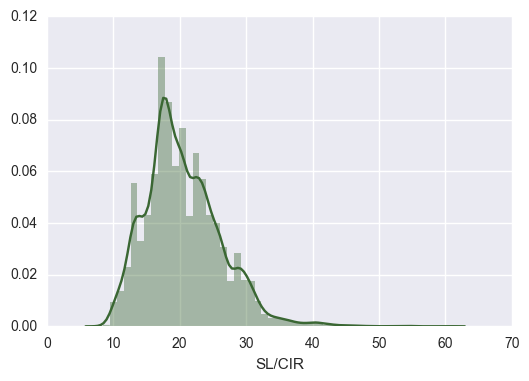

In [85]:
sns.distplot(df_tr['SL/CIR'], hist_kws={'edgecolor':'none'}, color='#3A6733')

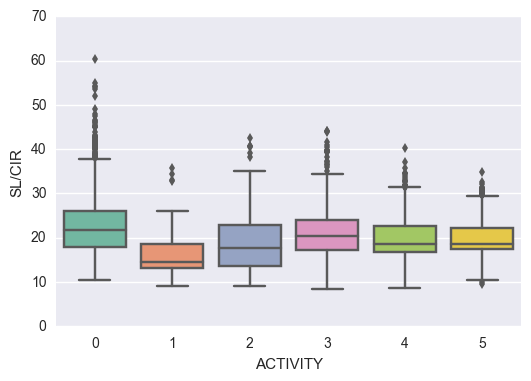

In [86]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'SL/CIR')

In [87]:
anova_calculator(df_tr, 'ACTIVITY', 'SL/CIR')

F_onewayResult(statistic=194.36693619440487, pvalue=1.0947997172920136e-198)

#### New feature: SL/HR

In [88]:
### Is there any HR equal to 0?
np.sum(df_tr['HR'] == 0)

0

In [89]:
df_tr['SL/HR'] = df_tr['SL']/df_tr['HR']

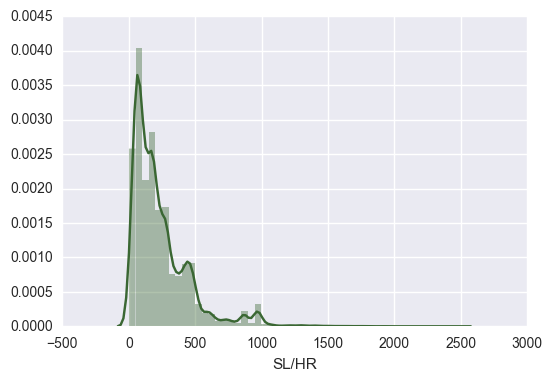

In [90]:
sns.distplot(df_tr['SL/HR'], hist_kws={'edgecolor':'none'}, color='#3A6733')

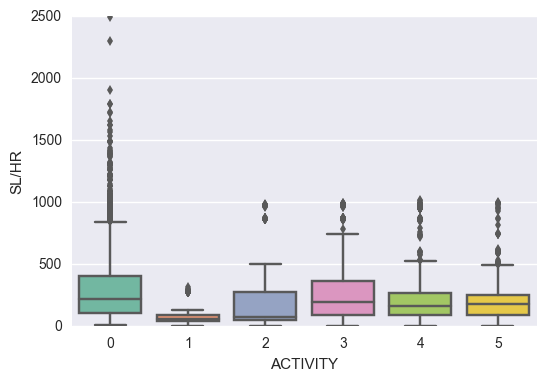

In [91]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'SL/HR')

In [92]:
anova_calculator(df_tr, 'ACTIVITY', 'SL/HR')

F_onewayResult(statistic=119.6999783501397, pvalue=1.479512711347584e-123)

In [93]:
### Log-transformed the SL/HR
np.sum(df_tr['HR'] <= 0)

0

In [94]:
df_tr['log_SL/HR'] = np.log1p(df_tr['SL/HR'])

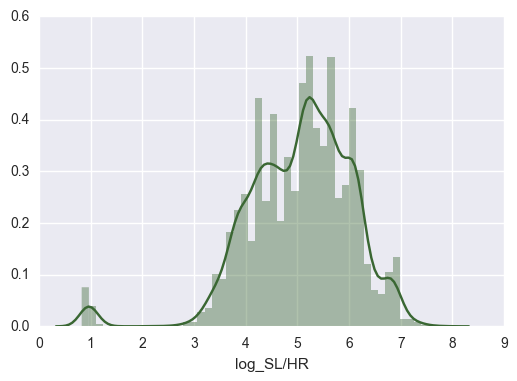

In [95]:
sns.distplot(df_tr['log_SL/HR'], hist_kws={'edgecolor':'none'}, color='#3A6733')

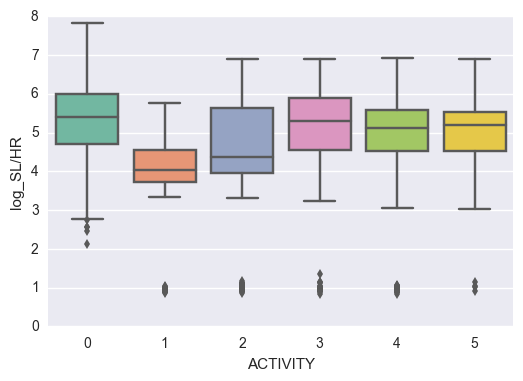

In [96]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'log_SL/HR')

In [97]:
anova_calculator(df_tr, 'ACTIVITY', 'log_SL/HR')

F_onewayResult(statistic=231.27956358275284, pvalue=5.7375550745139947e-235)

#### Check the new features

In [98]:
features = ['SL', 'EEG', 'CIRCLUATION', 'log_BP', 'log_HR', 'EEG_outlier', 'log_SL/HR', 'SL/CIR']

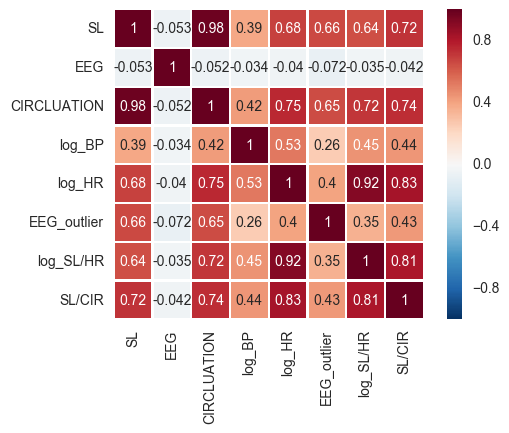

In [99]:
sns.heatmap(df_tr.ix[:, features].corr(), annot=True, square=True, linewidth=1)

In [100]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.737142857143
0.726275631855
0.739026717557
0.739503816794
0.731742243437
Mean Score (accuracy): 0.734738253357


In [101]:
for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

SL: 0.165543779892
EEG: 0.15981235625
log_SL/HR: 0.155988489691
SL/CIR: 0.136103146666
log_BP: 0.135608779652
CIRCLUATION: 0.126764035773
log_HR: 0.118706166181
EEG_outlier: 0.00147324589503


In [102]:
### remove CIRCLUATION
features = ['SL', 'EEG', 'log_BP', 'log_HR', 'EEG_outlier', 'log_SL/HR', 'SL/CIR']

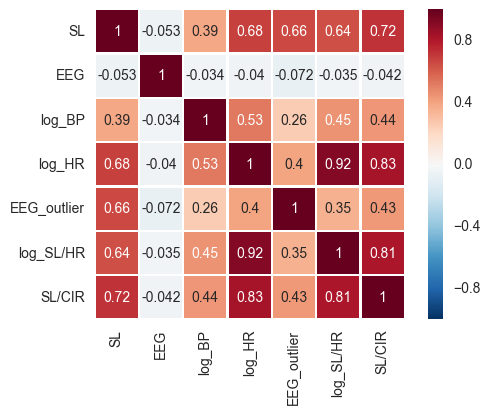

In [103]:
sns.heatmap(df_tr.ix[:, features].corr(), annot=True, square=True, linewidth=1)

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.726666666667
0.728183118741
0.726622137405
0.725667938931
0.721718377088
Mean Score (accuracy): 0.725771647766


In [105]:
for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

SL: 0.189272320204
log_SL/HR: 0.184961212726
EEG: 0.175035494215
log_HR: 0.153372273047
SL/CIR: 0.152240677897
log_BP: 0.143801774465
EEG_outlier: 0.00131624744643


The performance is worse...

#### New feature: HR/CIRCLUATION

In [106]:
### Is there any CIRCLUATION equal to 0?
np.sum(df_tr['CIRCLUATION'] == 0)

0

In [107]:
df_tr['HR/CIRCLUATION'] = df_tr['HR']/df_tr['CIRCLUATION']

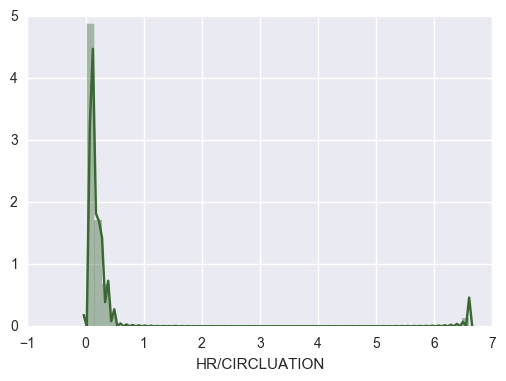

In [108]:
sns.distplot(df_tr['HR/CIRCLUATION'], hist_kws={'edgecolor':'none'}, color='#3A6733')

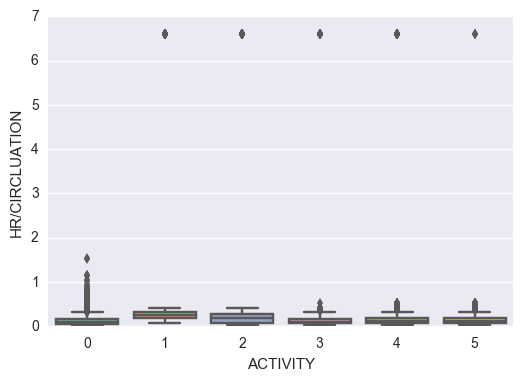

In [109]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'HR/CIRCLUATION')

In [110]:
df_tr['log_HR/CIRCLUATION'] = np.log1p(df_tr['HR/CIRCLUATION'])

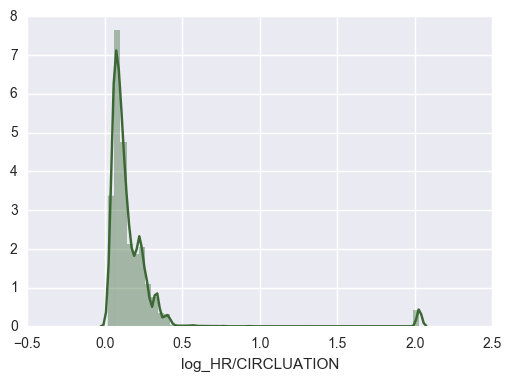

In [111]:
sns.distplot(df_tr['log_HR/CIRCLUATION'], hist_kws={'edgecolor':'none'}, color='#3A6733')

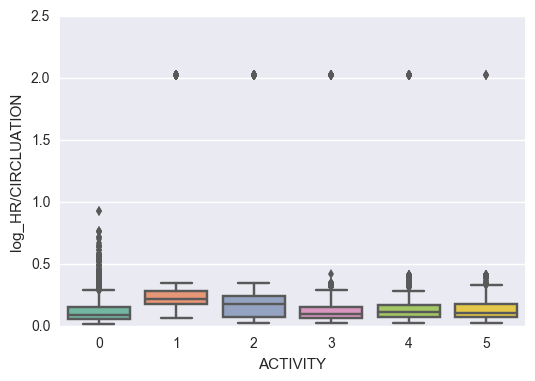

In [112]:
plot_cat_against_num(df_tr, 'ACTIVITY', 'log_HR/CIRCLUATION')

In [113]:
anova_calculator(df_tr, 'ACTIVITY', 'log_HR/CIRCLUATION')

F_onewayResult(statistic=213.525191915177, pvalue=1.3769672449710377e-217)

#### Check the performance

In [204]:
features = ['SL', 'EEG', 'CIRCLUATION', 'log_BP', 'log_HR', 'EEG_outlier', 'log_SL/HR', 'SL/CIR', 'log_HR/CIRCLUATION']

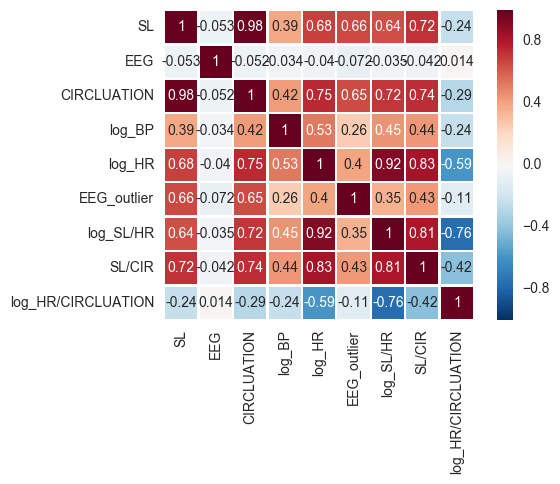

In [205]:
sns.heatmap(df_tr.ix[:, features].corr(), annot=True, square=True, linewidth=1)

In [208]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.751904761905
0.747734859323
0.739026717557
0.736641221374
0.741766109785
Mean Score (accuracy): 0.743414733989


In [207]:
for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

EEG: 0.163614030338
log_SL/HR: 0.135702768154
SL: 0.131817313876
log_BP: 0.127830847649
SL/CIR: 0.125970299628
log_HR: 0.115206428534
log_HR/CIRCLUATION: 0.112064621529
CIRCLUATION: 0.0864111261411
EEG_outlier: 0.00138256414984


In [200]:
### remove CIRCLUATION
features = ['SL', 'EEG', 'log_BP', 'log_HR', 'EEG_outlier', 'log_SL/HR', 'SL/CIR', 'log_HR/CIRCLUATION']

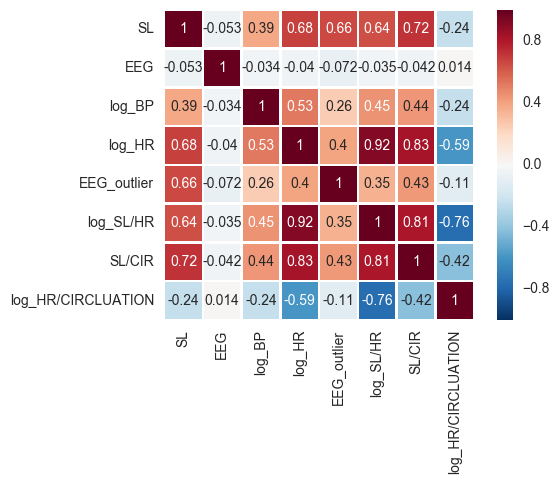

In [201]:
sns.heatmap(df_tr.ix[:, features].corr(), annot=True, square=True, linewidth=1)

In [202]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.751428571429
0.737720553171
0.74427480916
0.739026717557
0.742720763723
Mean Score (accuracy): 0.743034283008


In [203]:
for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

SL: 0.164641921116
EEG: 0.162821732103
log_SL/HR: 0.144452285455
SL/CIR: 0.137801237921
log_BP: 0.133919341927
log_HR/CIRCLUATION: 0.130006250088
log_HR: 0.124782376495
EEG_outlier: 0.00157485489502


Worse...

In [127]:
### remove log_HR/CIRCLUATION
features = ['SL', 'EEG', 'CIRCLUATION', 'log_BP', 'log_HR', 'EEG_outlier', 'log_SL/HR', 'SL/CIR']

In [125]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.743333333333
0.744873628994
0.733301526718
0.734255725191
0.734128878282
Mean Score (accuracy): 0.737978618503


In [126]:
for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

EEG: 0.16446216666
log_SL/HR: 0.16124675749
SL: 0.152652442963
SL/CIR: 0.135816731445
log_BP: 0.135549702075
CIRCLUATION: 0.125652989277
log_HR: 0.122968210635
EEG_outlier: 0.00165099945539


Worse...

In [134]:
### remove CIRCLUATION and log_HR/CIRCLUATION 
features = ['SL', 'EEG', 'log_BP', 'log_HR', 'EEG_outlier', 'log_SL/HR', 'SL/CIR']

In [135]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.745714285714
0.728659990463
0.729007633588
0.734255725191
0.731264916468
Mean Score (accuracy): 0.733780510285


In [131]:
for ind in range(len(model.feature_importances_)):
    print(np.array(features)[np.argsort(model.feature_importances_)[::-1]][ind]+':',
         np.array(model.feature_importances_)[np.argsort(model.feature_importances_)[::-1]][ind])

log_SL/HR: 0.183829058384
SL: 0.182436716196
EEG: 0.179526143516
log_HR: 0.157498299846
SL/CIR: 0.155807712896
log_BP: 0.138897888193
EEG_outlier: 0.00200418096861


Worse...

## Modeling

### Test the data on different models

In [209]:
features = ['SL', 'EEG', 'CIRCLUATION', 'log_BP', 'log_HR', 'EEG_outlier', 'log_SL/HR', 'SL/CIR', 'log_HR/CIRCLUATION']

#### Random forest

In [212]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model_testing(model, df_tr, features, seed)

0.74380952381
0.752980448259
0.737595419847
0.74570610687
0.746062052506
Mean Score (accuracy): 0.745230710258


#### XGB

In [222]:
from xgboost import XGBClassifier
model = XGBClassifier()

model_testing(model, df_tr, features, seed)

0.667142857143
0.654268001907
0.642652671756
0.656488549618
0.65107398568
Mean Score (accuracy): 0.654325213221


#### Logistic regression

In [220]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV()

model_testing(model, df_tr, features, seed)

0.352380952381
0.346208869814
0.364503816794
0.362118320611
0.350357995227
Mean Score (accuracy): 0.355113990965


#### SVM

In [216]:
from sklearn.svm import SVC
model = SVC()

model_testing(model, df_tr, features, seed)

0.293333333333
0.290891750119
0.293893129771
0.294370229008
0.290692124105
Mean Score (accuracy): 0.292636113267
